<a href="https://colab.research.google.com/github/offxabhi/Abhishek/blob/main/Penny%20Stock%20prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports and basic settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from datetime import datetime
%matplotlib inline
warnings.filterwarnings('ignore')
print('Imports ready')

Imports ready


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.405312,35.272184,26.784310,28.926412,855215656
2007-10-08,30.746399,33.500529,30.553126,33.500529,126671715
2007-10-09,32.840179,33.130087,29.103582,30.762501,116725709
2007-10-10,33.146194,33.822648,32.856287,33.693799,67931378
2007-10-11,36.850578,38.654453,32.856287,38.654453,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.141362,80.170391,78.124958,79.178243,1.188963e+07
std,63.296897,64.036505,62.509396,63.278624,2.061999e+07
min,18.919931,20.224754,16.962698,20.126892,0.000000e+00
25%,36.371858,36.945689,35.834694,36.409107,4.799653e+06
50%,55.265985,55.904114,54.526364,55.372092,8.344398e+06
75%,82.755154,83.742971,81.773886,82.777674,1.362032e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [8]:
df = df.reset_index()
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [9]:
df.to_csv("powergrid.csv")
data01 = pd.read_csv("powergrid.csv")
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.405311584472656,35.272183740096956,26.784310258909947,28.92641169531458,855215656
2,1,2007-10-08,30.74639892578125,33.50052864335988,30.55312582175099,33.50052864335988,126671715
3,2,2007-10-09,32.840179443359375,33.13008689743789,29.10358234346671,30.762501345895423,116725709
4,3,2007-10-10,33.14619445800781,33.82264811944262,32.85628699426067,33.6937986587072,67931378


In [10]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [11]:
df = df.drop([('Price', ''), ('Price', 'Adj Close')], axis = 1, errors='ignore')

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.405312,35.272184,26.784310,28.926412,855215656
1,2007-10-08,30.746399,33.500529,30.553126,33.500529,126671715
2,2007-10-09,32.840179,33.130087,29.103582,30.762501,116725709
3,2007-10-10,33.146194,33.822648,32.856287,33.693799,67931378
4,2007-10-11,36.850578,38.654453,32.856287,38.654453,106320954


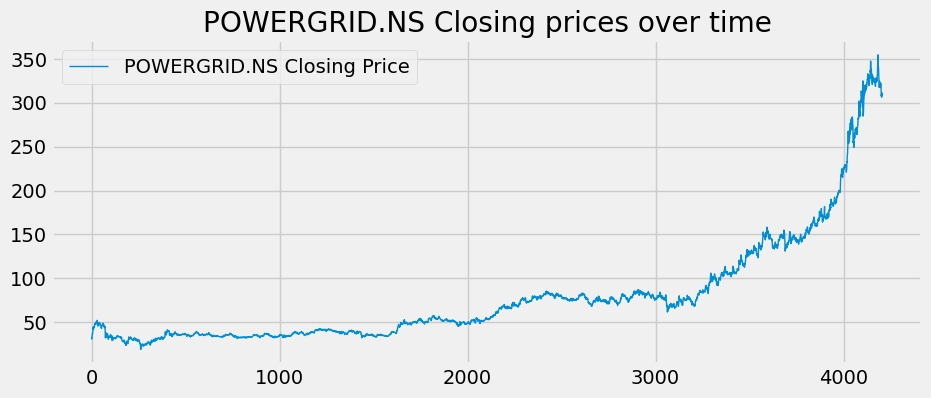

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

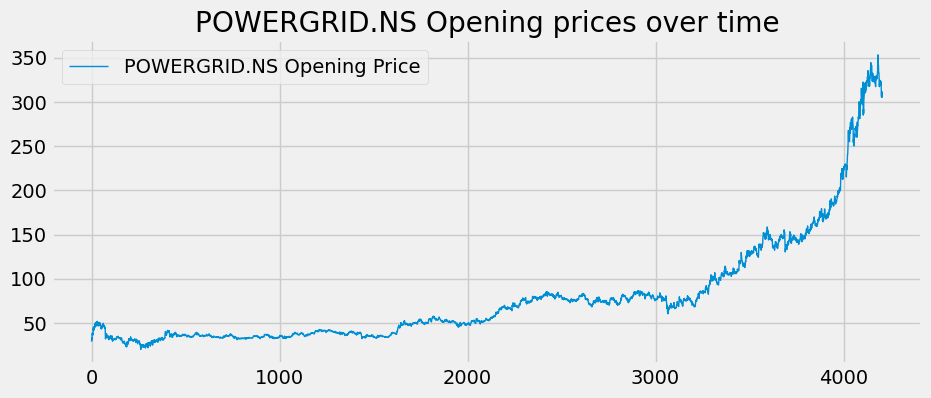

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

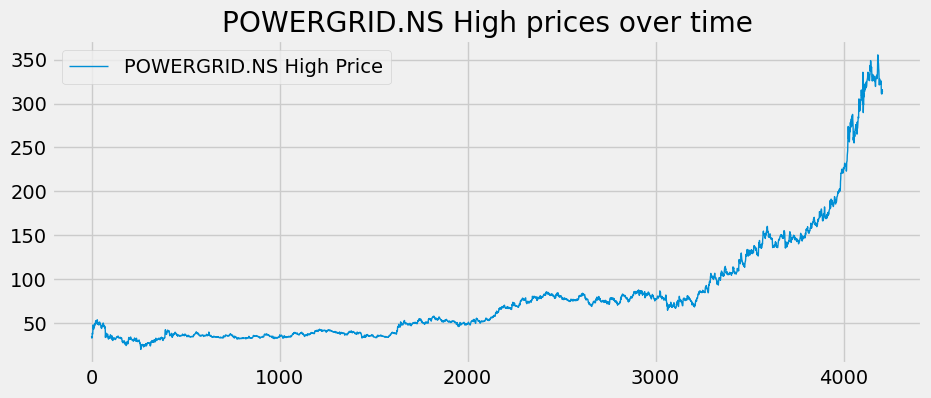

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

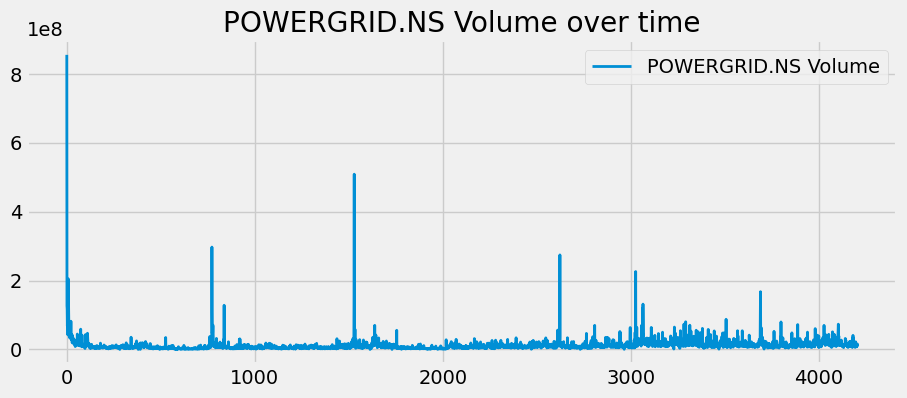

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [17]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)
50.0
import pandas as pd
df01 = pd.DataFrame(temp_data)
df01.rolling(5).mean()

50.0


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [18]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,323.594427
4204,323.834958
4205,324.069895
4206,324.268579


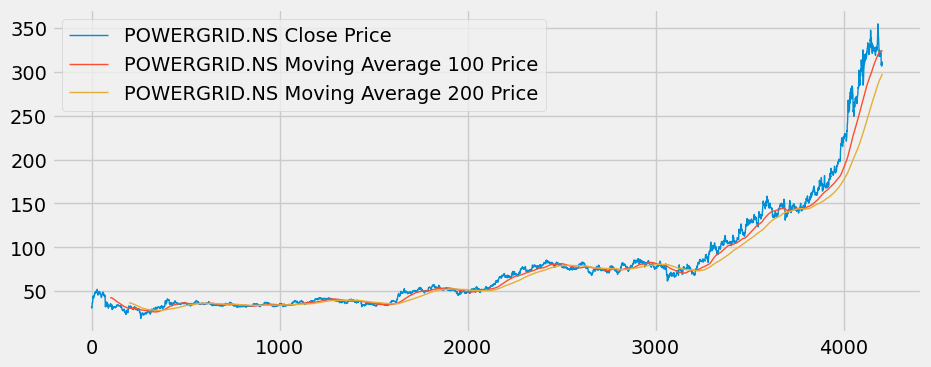

In [19]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(10, 4))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

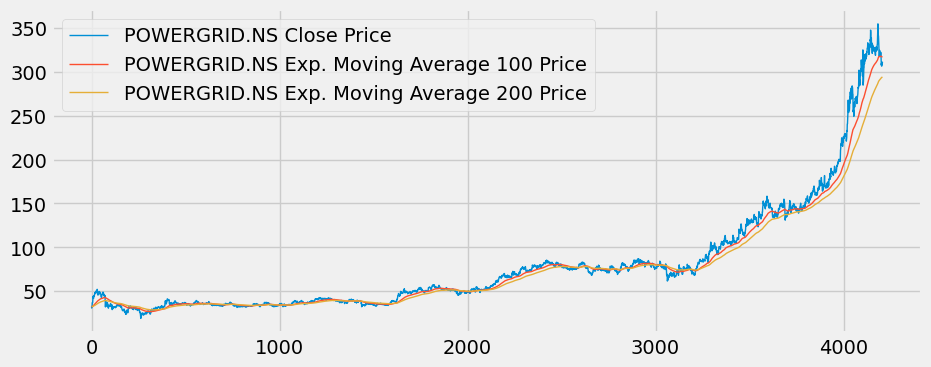

In [20]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()
plt.figure(figsize=(10, 4))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [25]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.19808599],
       [0.17371832],
       [0.20447374],
       ...,
       [0.90774437],
       [0.86000351],
       [0.87299631]])

In [27]:
data_training_array.shape[0]

2945

In [28]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [29]:
x_train.shape

(2845, 100, 1)

In [30]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
# LSTM Input -> 3D Array (batch_size, time_steps, seq_len) LSTM 2D OR 3D 2D -> (batch_sizem units) 3D -> (batch_size, time_steps, units)

model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 31s 269ms/step - loss: 0.0090
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step - loss: 0.0056
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - loss: 0.0049
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - loss: 0.0052
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 38s 247ms/step - loss: 0.0050
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 265ms/step - loss: 0.0046
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - loss: 0.0038
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - loss: 0.0039
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 39s 255ms/step - loss: 0.0036
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - loss: 0.0037


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [35]:
final_df.head()

Ticker,POWERGRID.NS
0,75.777992
1,77.322838
2,77.587067
3,77.424469
4,77.871635


In [36]:
input_data = scaler.fit_transform(final_df)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [38]:
x_test.shape

(1263, 100, 1)

In [39]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step


In [40]:
y_predicted.shape

(1263, 1)

In [41]:
scaler.scale_

array([0.00341187])

In [42]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

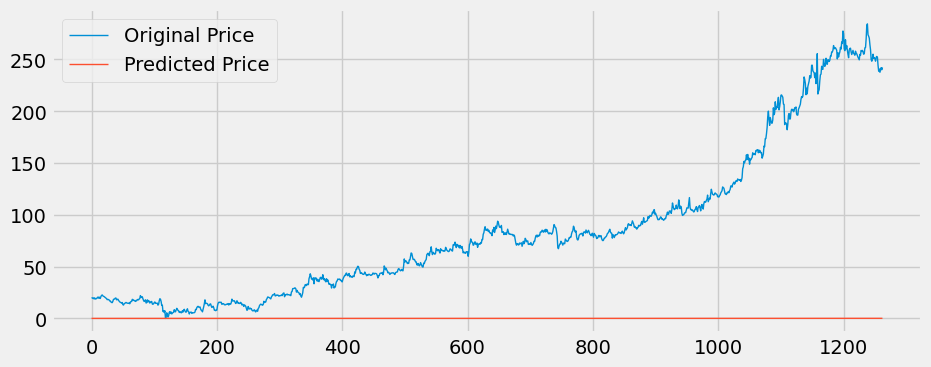

In [43]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [44]:
model.save('my_model.keras')